# Recap: basic computer vision pipeline
1. Image -> get feature -> model -> result
    1. feature: HOG, LBP, Euclidean distance
    2. Model: Regression, Classification (logistic regression)
    
# Classification
1. Least square
    1. Function to determine class: $y=W*V^T = w_1v_1+w_2v_2....$, 
        1. y is class, and we need to calculate W. 
        2. $v_{ij}$ is the j'th feature of sample i.
        3. N equations for N samples.
    2. Instead, solve the partial differential equation: 
    $$\hat{y_i}=W*V^T$$
    $$\sum_i(\hat{y_i}-y_i^*)^2=0$$
    $$then \; \dfrac{\partial \sum_i(\hat{y_i}-y_i^*)^2=0}{\partial w_j}=0$$
    Number of partial differential equation equals to number of $w_j$
2. Maximum Likelihood Estimate (MLE)
$$
Max(L) : L=\prod_{i=1}^{N} P_{i}$$
$$P = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(y^*-\hat{y})^{2}}{2 \sigma^{2}}\right)^{2}
$$
$$Max(log(L)):
\sum_{i=1}^{N} \log \frac{1}{\sqrt{2 \pi} \sigma}-\frac{1}{2 \sigma^{2}} \cdot \sum_{i}^{N}(y^*-\hat{y})^{2}
$$
$$equavelent \; to \; Min(\frac{1}{2 \sigma^{2}} \cdot \sum_{i}^{N}(y^*-\hat{y})^{2})$$
This matches least square

# Gradient descent
This is an optimization method to calculate W without expclitely solving equations.
1. Process
    1. initialize $W=W_0$
    2. $y=W_0*V^T$ and calculate loss
    3. If loss within a range small enough, output W. If not, update W until converges.
2. Loss
    1. L2: $$\sum_i(\hat{y_i}-y_i^*)^2$$
3. Update rule 
    1. When variable moves in the direction of negative gradient, function value decreases.
    2. Gradient to calculate here : 
    $$\frac{d L}{d w} \cdot \frac{d y}{d x}$$
    3. Update (lr is learning rate, a hyperparameter): $$ w_{k+1}=w_{k}-\frac{\partial L}{\partial w_{k}} \cdot lr $$

## Practice: use gradient descent to classify number images

In [2]:
import torch

def generate_data():
    # generage number matrix
    image_data=[]
    num_0 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_0)
    num_1 = torch.tensor(
    [[0,0,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_1)
    num_2 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,1,0,0,0],
    [0,1,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_2)
    num_3 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_3)
    num_4 = torch.tensor(
    [
    [0,0,0,0,1,0],
    [0,0,0,1,1,0],
    [0,0,1,0,1,0],
    [0,1,1,1,1,1],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_4)
    num_5 = torch.tensor(
    [
    [0,1,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,0,0,0,1,0],
    [0,1,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_5)
    num_6 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_6)
    num_7 = torch.tensor(
    [
    [0,1,1,1,1,0],
    [0,0,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_7)
    num_8 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_8)
    num_9 = torch.tensor(
    [[0,0,1,1,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,1,0],
    [0,1,0,0,1,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_9)
    return image_data
    
def get_feature(x):
    """feature extraction"""
    feature = torch.sum(x,0)+torch.sum(x,1)
    feature = feature[0:3]
    return feature

image_data = generate_data()
print(get_feature(image_data[0]))

tensor([2, 5, 4])


## Calculate gradient
$$\dfrac{d(WV^T-y^*)^2}{dV} = 2(WV^T-y^*)*W$$

In [44]:
import random
import numpy as np
class model:
    def __init__(self, size, lr):
        self.w = np.array([1 for _ in range(size)])
        self.lr = lr
    def loss(self,function='L2'):
        if function=='L2':
            return np.sum((self.y_hat-self.y)**2)
    def step(self,x,y):
        self.x = np.array(x)
        self.y = np.array(y)
        self.y_hat = np.dot(self.x,self.w)
        gradient = 2*(np.dot(self.w, self.x)-y)*self.w
        #print(self.w)
        #print(self.x)
        #print(self.y)
        #print(gradient)
        self.w = self.w - gradient*self.lr
    def predict(self,x):
        return int(np.dot(x,self.w))

In [47]:
labels = [0,1,2,3,4,5,6,7,8,9]
m = model(3,0.001)
for epoch in range(1000):
    loss = 0
    for i,x in enumerate(image_data):
        v = get_feature(x)
        y = labels[i]
        m.step(v,y)
        loss += m.loss()
        #print(loss)
    print(loss/len(image_data))
    

33.76259155055834
25.657812642160515
20.411858334874545
16.875325949472607
14.413757569496246
12.655775599971745
11.373517436086647
10.421674350468045
9.704551217310051
9.157387477621095
8.735324584011574
8.406658464203947
8.148586189294216
7.944453155405631
7.781929484288388
7.6517767810140995
7.5469986128865285
7.462245550741369
7.39339222787429
7.337232593136844
7.291257617074874
7.253491319720721
7.222368577430042
7.1966432088089265
7.175318241641139
7.1575925899728645
7.142819983343526
7.130477121392455
7.1201388294552945
7.111458565865132
7.1041530479166966
7.097990067485663
7.09277879128207
7.088362007067206
7.084609901648159
7.081415050286859
7.078688368350261
7.076355830388016
7.074355803581158
7.072636874762727
7.071156075262577
7.0698774273813045
7.06877075163128
7.067810685960308
7.066975877726523
7.06624831677915
7.065612784046105
7.06505639486528
7.06456822017681
7.06413897181682
7.063760740674198
7.0634267785123
7.063131315913213
7.0628694101485205
7.062636817878212
7.06

7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.060563839206698
7.06056383

7.060563839206698
7.060563839206698
7.060563839206698


In [54]:
m.predict(get_feature(image_data[6]))

5

# Logistic Regression
$$y=\frac{1}{1+e^{-w v+b}}$$

# Logistic regression on Boston Dataset

In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
import matplotlib.pyplot as plt

/Users/arkyyang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
#load data
data = load_boston()
X = data['data']
y = data['target']
print('data keys:', data.keys())
type(data)

data keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


sklearn.utils.Bunch

In [10]:
from sklearn.utils import Bunch
Bunch?

In [12]:
X.shape

(506, 13)

In [13]:
y.shape

(506,)

In [14]:
#data preprocessing

#normalize
X = (X-np.mean(X, axis=0))/np.std(X,axis=0)
y=y.reshape(y.shape[0],1)

In [15]:
y.shape

(506, 1)

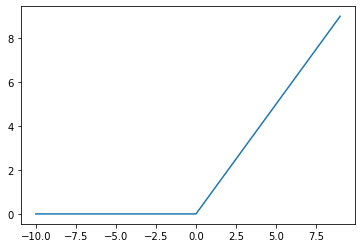

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def ReLU(z):
    a = np.where(z<0,0,z)
    return a
nums = np.arange(-10,10,step=1)
plt.plot(nums,ReLU(nums))

In [23]:
def MSE_loss(y, y_hat):
    loss = np.mean(np.square(y_hat-y))
    return loss
def Linear(x,w,b):
    return x.dot(w)+b

In [24]:
#initialization
n = X.shape[0]
n_features = X.shape[1]

W = np.random.randn(n_features,1)
b = np.zeros(1)

lr = 1e-2

epoches=10000

$$L = \frac{1}{2N}\sum_{i=1}^{N}(z^{i} - y^{i})^{2} $$
$$z^i = \sum_{j=0}^{N}x_j^{(i)}w^{(j)} + b^{(j)}$$
$$\frac{\partial L}{\partial w_j} = \frac{1}{N}\sum_{i}^{N}(z^{(i)} - y^{(i)})x_j^{(i)}$$
$$\frac{\partial L}{\partial b} = \frac{1}{N}\sum_{i}^{N}(z^{(i)} - y^{(i)})$$

In [25]:
def gradient(x,z,y):
    n = x.shape[0]
    grad_w = np.dot(x.T, (z-y))/n
    grad_b = np.mean(z-y)
    return grad_w, grad_b

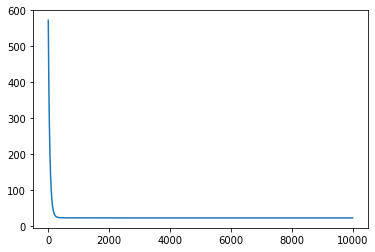

In [26]:
#training

losses=[]
for t in range(epoches):
    #forward
    y_hat = Linear(X,W,b)
    loss = MSE_loss(y,y_hat)
    losses.append(loss)
    
    #gradient calculation
    grad_w, grad_b = gradient(X,y_hat,y)
    
    #weight update
    W = W - lr*grad_w
    b = b - lr*grad_b
    
plt.plot(np.arange(len(losses)),losses)

## Introduce hidden layer and activation layers

In [43]:
hidden_size = 10
#initialize hidden layer
W1 = np.random.randn(n_features,hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size,1) #output is of size 1
b2 = np.zeros(1)

$$z = \sum^{N}(\sum_{j=0}^{N}x_j^{(i)}w1^{(j)} + b1^{(j)})^{(i)}w2^{(i)} + b2^{(i)}$$
$$\frac{\partial L}{\partial w2} = \frac{1}{N}\sum_{i}^{N}(z2^{(i)} - y^{(i)})x_j^{(i)}$$
$$\frac{\partial L}{\partial b2} = \frac{1}{N}\sum_{i}^{N}(z2^{(i)} - y^{(i)})$$
$$\frac{\partial L}{\partial w1} = z\frac{1}{N}\sum_{i}^{N}(z1^{(i)} - y^{(i)})x_j^{(i)}$$
$$\frac{\partial L}{\partial b1} = \frac{1}{N}\sum_{i}^{N}(z1^{(i)} - y^{(i)})$$

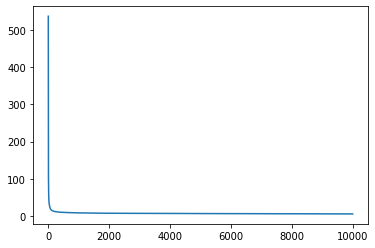

In [44]:
#training

losses=[]
for t in range(epoches):
    #forward
    z1 = Linear(X,W1,b1)
    a1 = ReLU(z1)
    z2 = Linear(a1,W2,b2)
    a2 = ReLU(z2)
    y_hat = a2
    loss = MSE_loss(y,y_hat)
    losses.append(loss)
    
    #backpropagation
    grad_y_pred = y_hat -y
    grad_W2 = np.dot(a1.T,grad_y_pred)/n
    grad_b2 = np.mean(grad_y_pred, axis=0)
    grad_a1 = grad_y_pred.dot(W2.T) 
    #print(W2.shape, grad_y_pred.shape,grad_a1.shape)
    grad_a1[z1<0] = 0
    grad_W1 = np.dot(X.T,grad_a1)/n
    grad_b1 = np.mean(grad_a1,axis=0)
    
    #weight update
    W1 = W1 - lr*grad_W1
    b1 = b1 - lr*grad_b1
    W2 = W2 - lr*grad_W2
    b2 = b2 - lr*grad_b2
    
plt.plot(np.arange(len(losses)),losses)

In [39]:
z2.shape

(506, 1)

## Logistic regression on IRIS dataset

### Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

/Users/arkyyang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/arkyyang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/arkyyang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/arkyyang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/arkyyang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size ch

In [2]:
dataset = load_iris()

In [9]:
inputs = dataset["data"]
target = dataset["target"]
print(inputs.shape)
print(target.shape)
print(set(target))

(150, 4)
(150,)
{0, 1, 2}


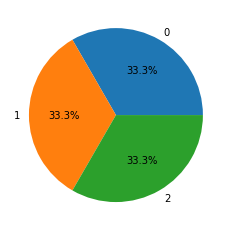

In [10]:
values = [np.sum(target==0),np.sum(target==1),np.sum(target==2)]
plt.pie(values,labels=[0,1,2],autopct='%1.1f%%')
plt.show()

### Data preprocessing

In [11]:
#only use first two classes
two_class_input = inputs[:100]
two_class_target = target[:100]

In [12]:
from sklearn.model_selection import train_test_split

/Users/arkyyang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(two_class_input,two_class_target,test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape)

(70, 4) (30, 4) (70,)


In [20]:
# add one feature to x
x_train = np.concatenate([x_train,np.ones((x_train.shape[0],1))],1)
x_test = np.concatenate([x_test,np.ones((x_test.shape[0],1))],1)
print(x_train.shape, x_test.shape, y_train.shape)

(70, 5) (30, 5) (70,)


### Cross Entropy loss
+ Loss function
$$L=\frac{1}{m}*\sum_i^m -y_ilog(f(x_i))-(1-y_i)log(1-f(x_i))$$

+ Gradient
$$ \frac{\partial L}{\partial w} = \frac{1}{m}X^T*(f(x)-y)$$

+ Weight update
$$ w = w -\alpha\frac{\partial L}{\partial w}$$

In [79]:
def CrossEntropyLoss(y,yhat):
    return np.mean(-y*np.log(yhat)-(1-y)*np.log(1-yhat))
def CrossEnroptyLoss_grad(X,y,yhat):
    m = X.size
    dif = yhat-y
    #print(X.T.shape,dif.shape)
    return np.dot(X.T,dif)/m
def forward(x,w):
    return sigmoid(np.dot(x,w))

### Training

In [80]:
# weight initialization
w = np.random.normal(scale=0.1, size=(5,))
w[-1]=0
print('Initial weight: ',w)

Initial weight:  [-0.02712331 -0.12056321 -0.10701052  0.02034531  0.        ]


In [81]:
last_loss=10000
x = x_train
y = y_train
yhat = forward(x,w)
cur_loss=CrossEntropyLoss(y,yhat)
i=0
lr = 0.001
while abs(cur_loss-last_loss)>1.0e-4:
    #print(i,last_loss,cur_loss)
    last_loss = cur_loss
    i+=1
    #gradient calculation
    grad = CrossEnroptyLoss_grad(x,y,yhat)
    #weight update
    w += -lr*grad
    
    #forward
    yhat = forward(x,w)
    cur_loss = CrossEntropyLoss(y,yhat)
    if i%100==0:
        print("Iteration {}, loss, {:.4f}".format(i,cur_loss))

Iteration 100, loss, 0.7689
Iteration 200, loss, 0.7264
Iteration 300, loss, 0.6970
Iteration 400, loss, 0.6758
Iteration 500, loss, 0.6598
Iteration 600, loss, 0.6469
Iteration 700, loss, 0.6360


### Validate

In [84]:
x = x_test
y = y_test
y = forward(x,w)
print(y)

[0.48497001 0.54856182 0.48202407 0.53973077 0.5470753  0.53432218
 0.47455415 0.54425255 0.55400868 0.53098463 0.54906864 0.54281533
 0.54414327 0.47987984 0.48117769 0.48759447 0.46786887 0.48036328
 0.4644239  0.48711619 0.48543508 0.55351756 0.48448555 0.54271899
 0.49121536 0.47654814 0.47709006 0.53790526 0.53950671 0.55719659]


In [60]:
np.mean(np.argmax(y,axis=1)==y)

/Users/arkyyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


0.0

In [85]:
test_pred = sigmoid(np.dot(x_test, w))
pred_test_y = np.array(test_pred>0.5, dtype=np.float32)
acc = np.mean(pred_test_y==y_test)
print("the accary of model is {}".format(acc))

the accary of model is 1.0
